In [1]:
import pandas as pd
import os
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt


In [2]:
file_path = '/Users/yanlixu/Desktop/pingan/合作/CDK12/220616/LINSCP_for_drug_combinations'
files = os.listdir(file_path)

In [3]:
file_list = []
gene_list = []
diff_value_list = []

for file in files:
    if os.path.isfile(os.path.join(file_path, file)):
        file_list.append(file.replace(' .csv', ''))
        if file == 'LINCSCP_30171 .csv':
            gene_list = data['Name_GeneSymbol'].tolist()       
        data = pd.read_csv(os.path.join(file_path, file))
        diff_value_list.append(data['Value_LogDiffExp'].tolist())

     

In [4]:
diff_value_df = pd.DataFrame(diff_value_list)
diff_value_df = diff_value_df.transpose()

In [5]:
diff_value_df.columns = file_list
diff_value_df.index = gene_list
diff_value_df


LINCSCP_38362  LINCSCP_34341  LINCSCP_143009  LINCSCP_32915  \
AARS          1.494280      -0.619955        4.019460      -2.331810   
ABCF1        -1.079000       0.331871       -0.869827      -2.765140   
ABL1         -2.922490      -1.064530       -1.657750      -1.158990   
ACAA1         0.546718      -0.595667        1.216550      -0.091681   
ACAT2        -0.059628       0.649373       -2.380550       0.433265   
...                ...            ...             ...            ...   
TXLNA         1.076610      -0.288040       -0.283192      -1.379400   
SPRED2        0.163661       0.161295       -0.167704       0.846945   
EML3          0.070458      -0.986843       -1.313710      -0.511510   
TMEM110      -1.040950       0.253314       -1.342180       0.459366   
FAM69A        0.027207       0.853779       -2.718890       0.410731   

         LINCSCP_30882  LINCSCP_32041  LINCSCP_30343  LINCSCP_134030  \
AARS         -0.063457      -4.853260       0.635163       -2.613470   
ABCF1         0.153361       0.990553       0.436411       -0.115094   
ABL1         -0.280789      -1.238150       0.883352       -1.196040   
ACAA1         0.586592       0.293339      -0.100985       -0.687410   
ACAT2         0.409297      -2.025530       0.289256       -0.413886   
...                ...            ...            ...             ...   
TXLNA         0.105837       0.584791      -0.095763        1.200010   
SPRED2        0.035816      -1.679320       0.583823        0.548437   
EML3          0.375487       1.721950       1.640430       -0.792332   
TMEM110       0.457051       4.215620      -0.798682       -0.460531   
FAM69A        0.507479      -1.213580      -0.274027        0.117494   

         LINCSCP_138013  LINCSCP_30986  ...  LINCSCP_38863  LINCSCP_37738  \
AARS           -1.33500      -0.343550  ...       -0.64210       0.589441   
ABCF1           0.09200       0.867296  ...       -0.47790      -1.014340   
ABL1           -1.34635      -0.225222  ...       -4.68355      -0.174940   
ACAA1          -2.61995       0.108072  ...        3.88960       0.040737   
ACAT2           1.85050       0.904678  ...        1.39060      -0.500403   
...                 ...            ...  ...            ...            ...   
TXLNA          -1.26715      -0.834586  ...       -4.34090      -0.122994   
SPRED2         -0.11865       0.395441  ...        0.98630      -0.669213   
EML3           -0.56980      -0.736650  ...        0.30320       0.213313   
TMEM110         0.42335      -0.845484  ...        0.73525      -0.888186   
FAM69A          0.83545      -0.192166  ...        0.78975      -0.800063   

         LINCSCP_138138  LINCSCP_140489  LINCSCP_241019  LINCSCP_32717  \
AARS           2.275850        0.317485        0.299537      -0.053473   
ABCF1          1.184140        0.140167       -1.243110       0.307844   
ABL1           0.401152        0.459429       -0.699727       0.388227   
ACAA1          0.228642        0.735920        0.177715       0.295074   
ACAT2         -0.585729        1.071690       -0.099666      -0.434428   
...                 ...             ...             ...            ...   
TXLNA         -0.684713        0.279481       -0.720292       1.063460   
SPRED2        -2.169700        0.808282       -0.118622       0.275208   
EML3           0.105797        0.037861       -0.675822       0.762196   
TMEM110       -0.288151        0.236437        0.045929      -0.023631   
FAM69A         0.012822        0.910366        0.427058      -0.349044   

         LINCSCP_138883  LINCSCP_37329  LINCSCP_141670  LINCSCP_240171  
AARS          -8.767110       0.926990       -1.721910       -1.147110  
ABCF1          2.176350       0.208830        0.017453        0.499426  
ABL1          -1.595640      -3.406730        0.017226       -1.449620  
ACAA1          3.775060      -0.225089        0.730956        0.130912  
ACAT2          0.624442      -5.543650        0.607123       -0.082746  
...                 ...    

## PART 1: plot all the genes

/opt/anaconda3/envs/deepchem_py37/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


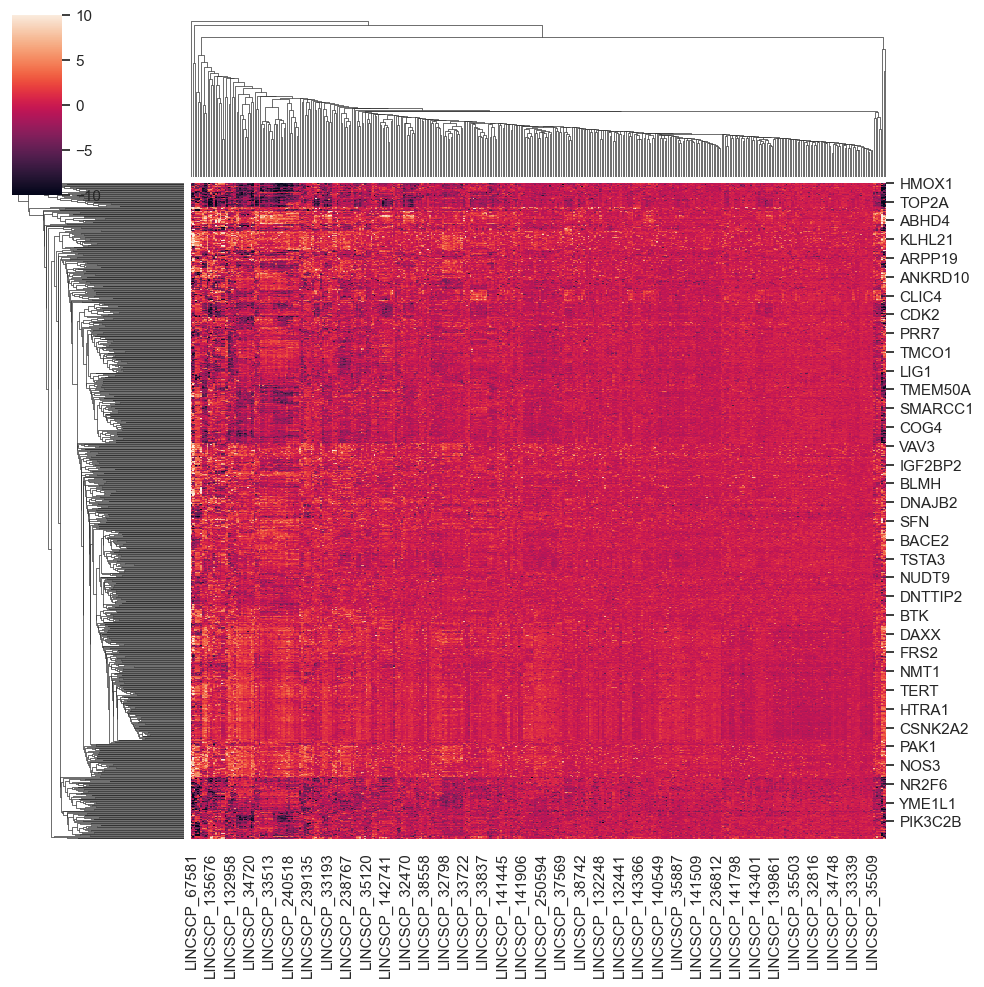

In [6]:
ax = sns.clustermap(diff_value_df)
plt.show()

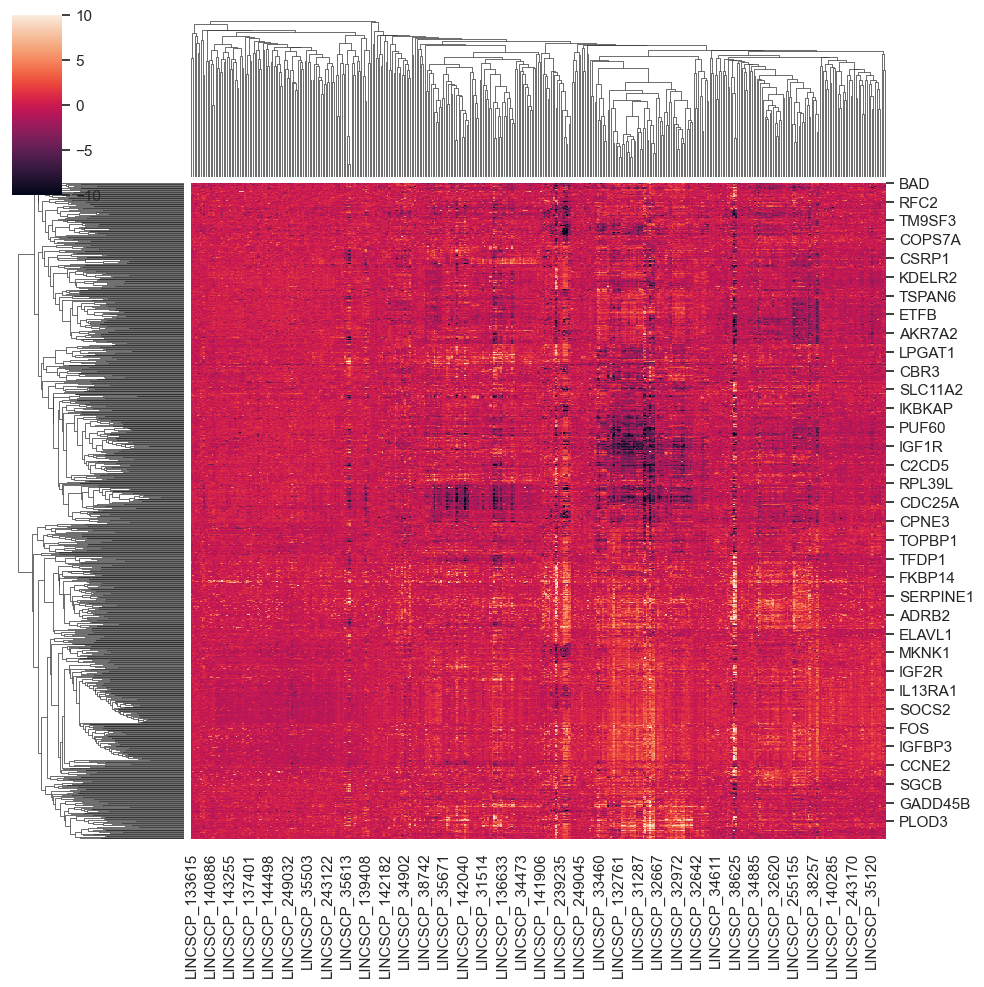

In [7]:
ax = sns.clustermap(diff_value_df, metric="correlation")
plt.show()

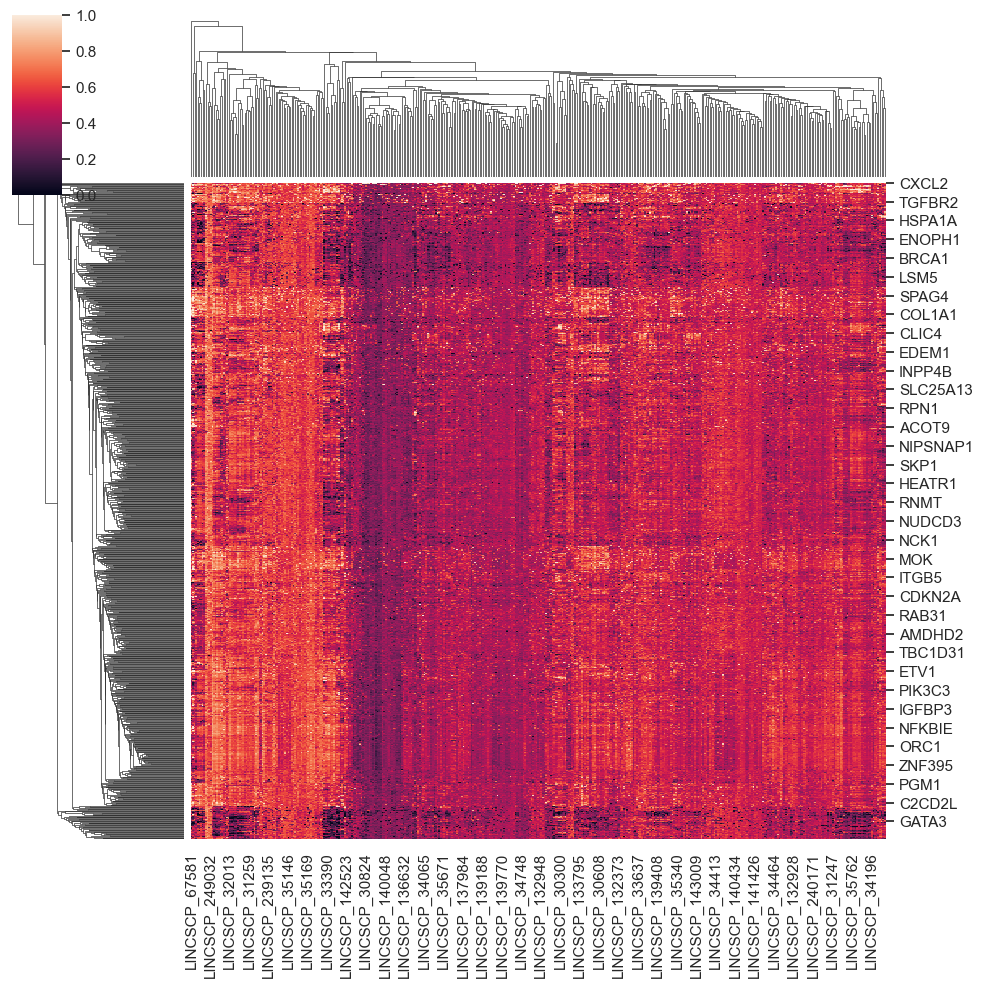

In [8]:
ax = sns.clustermap(diff_value_df, standard_scale=1)
plt.show()

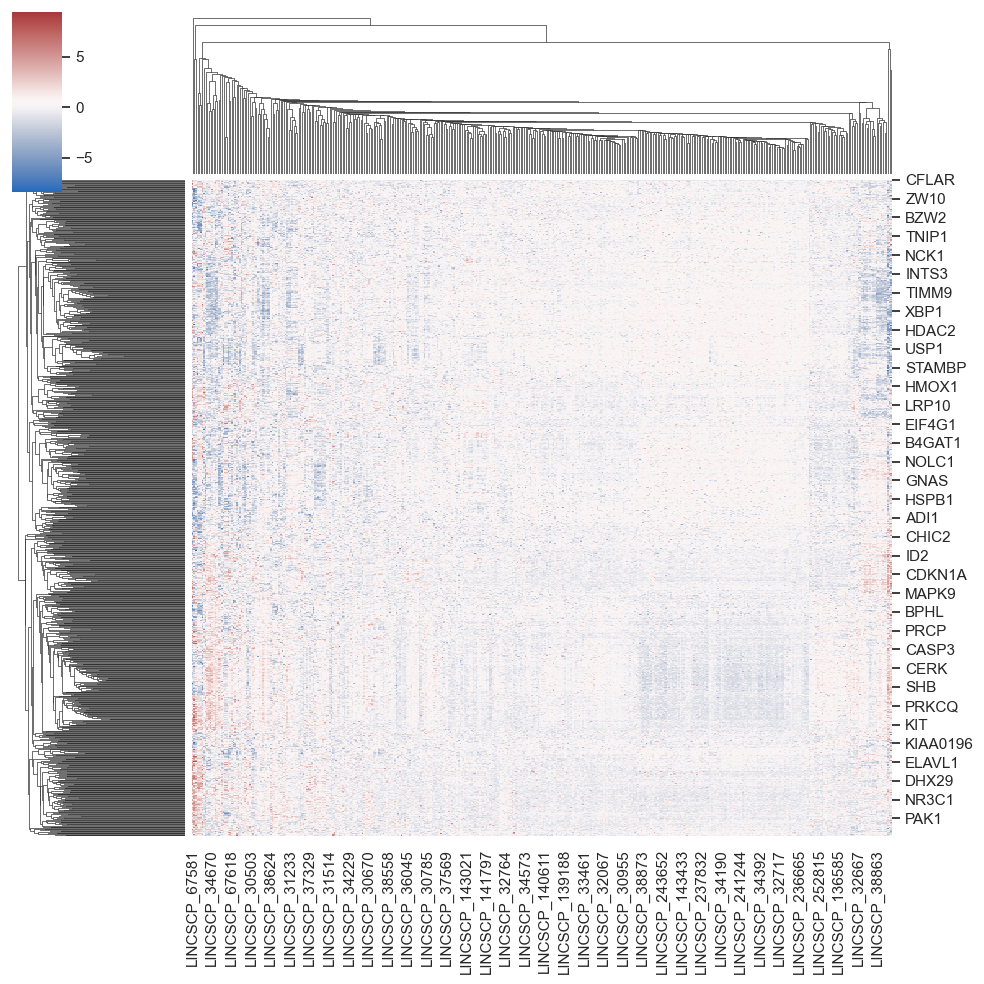

In [9]:
ax = sns.clustermap(diff_value_df, z_score=0, cmap="vlag")
plt.show()

## PART 2: plot top 150 up and down genes

In [11]:
# get top upregulated and down regulated genes
top_genes_data = pd.read_excel('/Users/yanlixu/Desktop/pingan/合作/CDK12/220616/1_breast_cancer_20220616.xlsx', sheet_name='100_hub_genes')
top_genes = top_genes_data['Name']


In [12]:
top_genes

0      KIF11
1       FGF2
2       BUB1
3      BUB1B
4      MKI67
       ...  
96     SCN5A
97       GPT
98      NTF3
99     ABCB1
100      NaN
Name: Name, Length: 101, dtype: object

In [13]:
# get the intersect of LINCS_data_genes and top upregulated and down regulated genes
top_genes_list = top_genes.tolist()
common_genes = list(set(top_genes_list) & set(diff_value_df.index))

In [14]:
diff_value_df_sub = diff_value_df.loc[common_genes]
diff_value_df_sub

LINCSCP_38362  LINCSCP_34341  LINCSCP_143009  LINCSCP_32915  \
CDC45       -2.254000      -0.837349       -1.275280      -2.951870   
CCNE2       -2.818080      -0.164087       -2.393930       0.365751   
HSPA8       -1.483600      -0.828392       -4.466820      -0.608944   
BUB1B       -0.535794       1.055980       -0.901259       0.800071   
HDAC2       -0.636867      -1.044870        0.703528       2.956210   
KIF20A       1.493510      -1.121580       -2.054590       0.256268   
DNMT3A       0.148841       1.090890        0.822662       0.601614   
PTGS2       -1.127900       2.710710       -0.350018      -0.271286   
PDGFA        2.095680       0.171962        0.146589       0.231468   
LAMA3        1.459710      -0.257526        0.550837      -0.549856   
KIT         -0.137399      -0.380553        0.481332       3.469160   
CXCL2        1.360430      -0.241379        1.175050      -0.785206   
KIF14        0.038464       0.207851       -4.805420      -0.138795   
SNCA         0.752974       0.839605        0.166914       1.484050   
ERBB2       -1.605100      -1.891180       -1.117130      -5.133450   
FGFR4        0.158094      -0.338320       -1.122110      -0.215939   

        LINCSCP_30882  LINCSCP_32041  LINCSCP_30343  LINCSCP_134030  \
CDC45       -1.685080      -5.170150      -0.672461       -0.706304   
CCNE2       -0.983786       2.177360      -0.680540       -0.252691   
HSPA8        0.224728      -2.298600      -0.587263       -0.668012   
BUB1B        0.924479      -1.014300       1.024760       -0.117735   
HDAC2       -0.225790      -1.272270      -0.747511       -0.407623   
KIF20A      -0.101459      -4.427990       0.091254       -3.251230   
DNMT3A      -0.333703       1.328110       0.725167       -0.276221   
PTGS2        0.818083       3.041240       0.289497        0.238413   
PDGFA       -0.945444      -1.943160      -0.080364       -0.451834   
LAMA3       -0.473519       4.629810       0.146468        0.602317   
KIT          0.066332       0.324077       1.510540       -0.129807   
CXCL2        0.711055       3.983530       1.632660        3.352420   
KIF14       -1.333330      -6.518820      -0.585335       -3.096290   
SNCA         0.351302       0.082307       0.638541       -0.473642   
ERBB2       -1.423450      -0.263740      -1.839590       -1.121880   
FGFR4        0.033537       1.050760       0.835038       -1.036270   

        LINCSCP_138013  LINCSCP_30986  ...  LINCSCP_38863  LINCSCP_37738  \
CDC45          0.85595      -2.320670  ...        1.47285      -0.370275   
CCNE2         -0.39125       0.340207  ...       -0.84065      -0.144835   
HSPA8         -0.63890      -0.640501  ...       -2.85540       0.525854   
BUB1B         -0.08335       0.651494  ...        0.44030      -0.721430   
HDAC2          0.98575      -0.182471  ...       -1.97720       0.331042   
KIF20A        -0.20355      -0.012478  ...       -1.57865       0.332457   
DNMT3A         0.23445       0.308116  ...        0.77620      -0.613750   
PTGS2          4.65520       1.799850  ...        0.74375       0.500716   
PDGFA          0.52395       0.023119  ...       -0.40175       0.594370   
LAMA3         -0.14105       1.297850  ...        0.20800       0.717905   
KIT            0.99595       0.306818  ...        1.97940       0.162612   
CXCL2          5.11535       2.341350  ...        5.98375       1.057060   
KIF14         -0.11720      -1.680940  ...       -4.98435      -0.712575   
SNCA           0.20900       0.317064  ...        1.22225      -0.693655   
ERBB2         -0.39840      -0.880392  ...       -1.60775      -0.115905   
FGFR4         -0.67540      -0.445151  ...        1.00860      -0.558800   

        LINCSCP_138138  LINCSCP_140489  LINCSCP_241019  LINCSCP_32717  \
CDC45         0.123617       -1.020580        0.446797       0.347484   
CCNE2         0.527185       -2.343720       -0.320007       0.409466   
HSPA8        -1.096510       -0.868298       -1.167830       0.720037   
BUB1B  

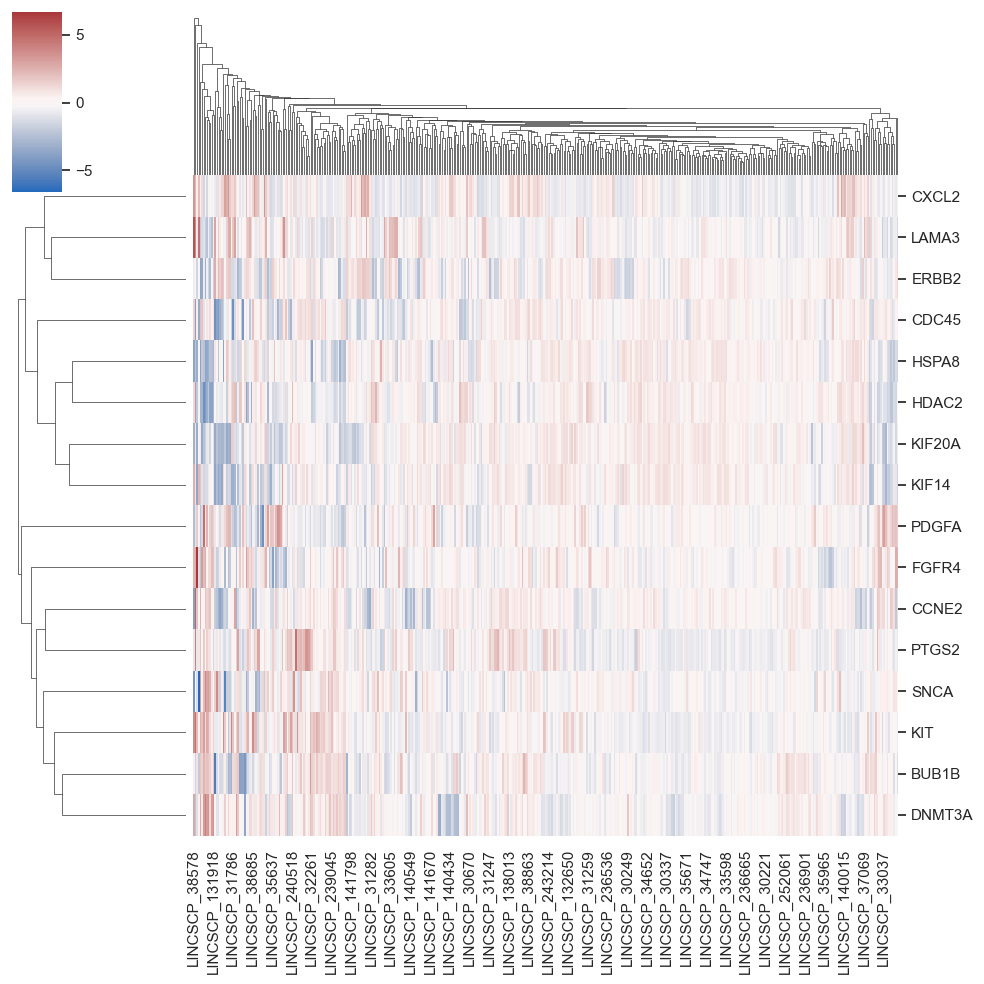

In [15]:
ax = sns.clustermap(diff_value_df_sub, z_score=0, cmap="vlag")
plt.show()

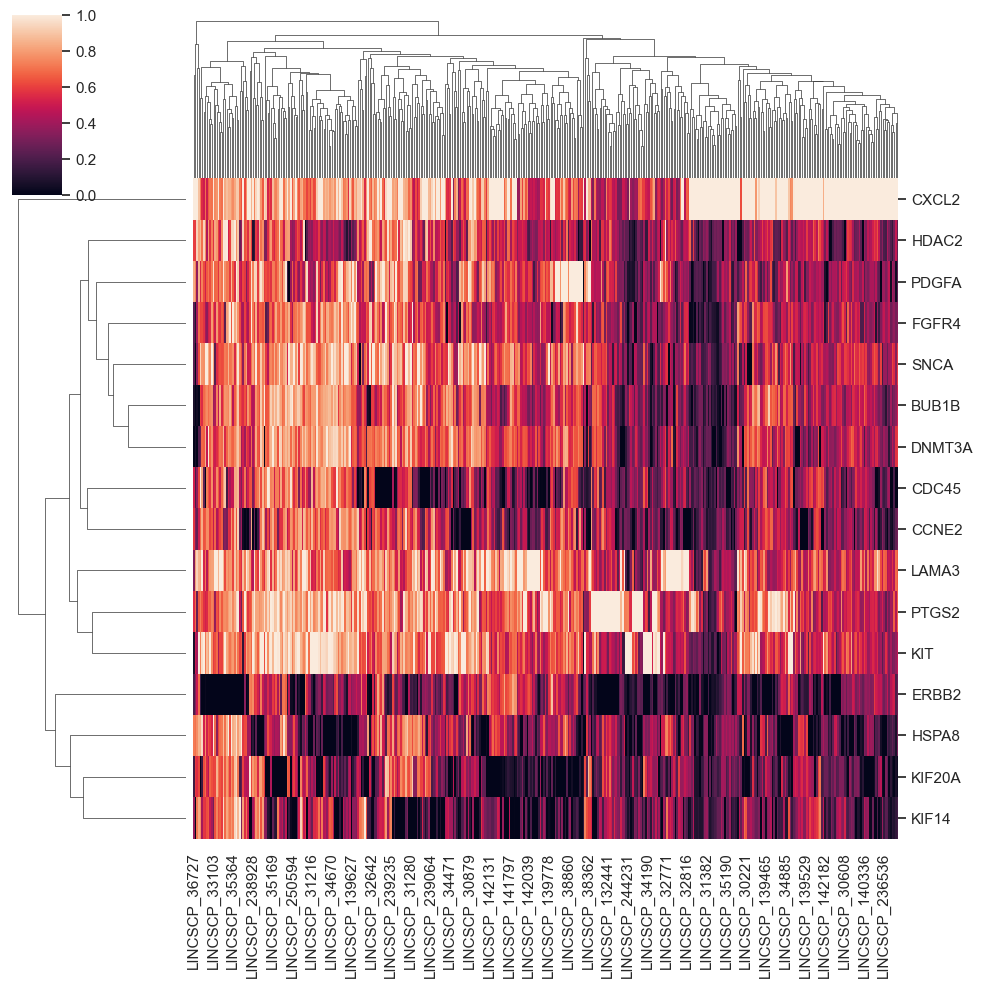

In [16]:
ax = sns.clustermap(diff_value_df_sub, standard_scale=1)
plt.show()

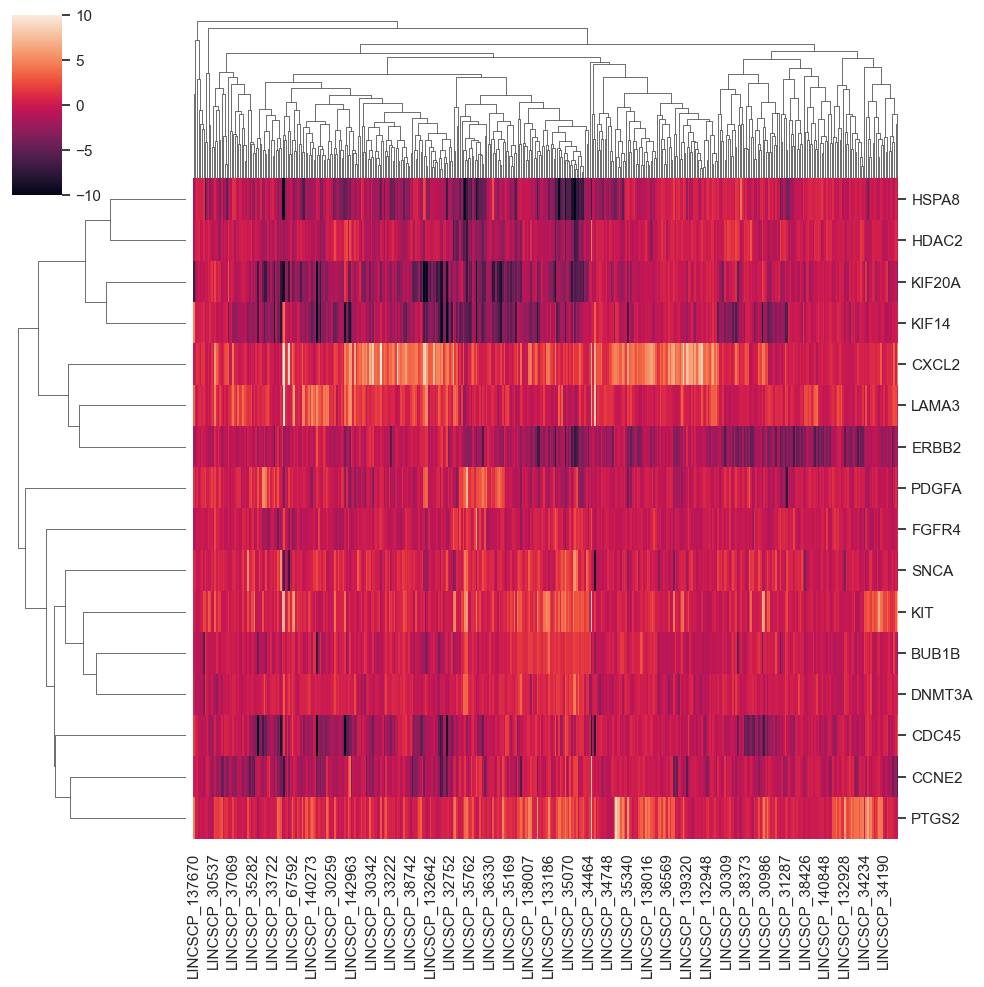

In [17]:
ax = sns.clustermap(diff_value_df_sub, metric="correlation")
plt.show()

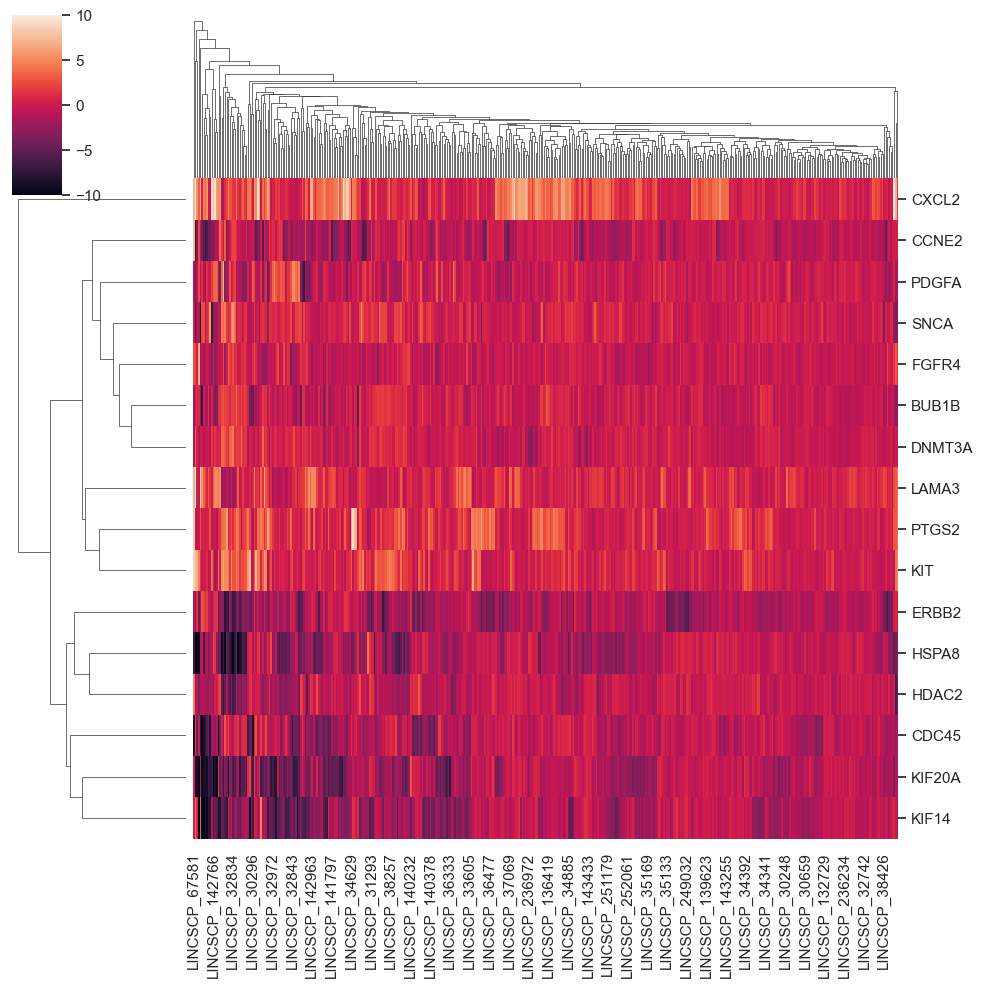

In [18]:
ax = sns.clustermap(diff_value_df_sub)
plt.show()